# **Importing libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model

# Data Processing (Resize,change datatype,split train test)

In [2]:
imgs_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"
data = []
labels = []
CLASSES = 43
# using for loop to access each image
for i in range(CLASSES):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(imgs_path + '/' + str(i) + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("data[0]: ",data[0])
print("labels[0: ]",labels[0])

data[0]:  [[[255 253 214]
  [255 253 215]
  [255 251 216]
  ...
  [239 222 186]
  [236 220 185]
  [235 217 183]]

 [[255 255 230]
  [255 255 229]
  [255 255 230]
  ...
  [254 241 204]
  [254 240 202]
  [253 239 202]]

 [[255 255 240]
  [255 255 237]
  [255 255 234]
  ...
  [255 247 206]
  [254 246 207]
  [254 244 208]]

 ...

 [[255 255 229]
  [255 255 226]
  [255 255 222]
  ...
  [182 170 140]
  [180 167 137]
  [179 166 137]]

 [[255 255 229]
  [255 255 224]
  [255 255 222]
  ...
  [195 182 151]
  [191 180 149]
  [191 179 147]]

 [[255 255 227]
  [255 255 226]
  [255 255 224]
  ...
  [203 191 157]
  [201 190 157]
  [201 187 155]]]
labels[0: ] 0


In [3]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
# convert interge label to one-hot data
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(y_train[1])


training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Build model by keras

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

# **Training the model**

In [5]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
491/491 [==============================] - 91s 183ms/step - loss: 2.1525 - accuracy: 0.4752 - val_loss: 0.5531 - val_accuracy: 0.8698
Epoch 2/20
491/491 [==============================] - 89s 182ms/step - loss: 0.6685 - accuracy: 0.8120 - val_loss: 0.1817 - val_accuracy: 0.9572
Epoch 3/20
491/491 [==============================] - 89s 181ms/step - loss: 0.3689 - accuracy: 0.8955 - val_loss: 0.1167 - val_accuracy: 0.9744
Epoch 4/20
491/491 [==============================] - 89s 182ms/step - loss: 0.2679 - accuracy: 0.9235 - val_loss: 0.0837 - val_accuracy: 0.9807
Epoch 5/20
491/491 [==============================] - 89s 182ms/step - loss: 0.2287 - accuracy: 0.9345 - val_loss: 0.0865 - val_accuracy: 0.9802
Epoch 6/20
491/491 [==============================] - 89s 182ms/step - loss: 0.1814 - accuracy: 0.9499 - val_loss: 0.0483 - val_accuracy: 0.9875
Epoch 7/20
491/491 [==============================] - 89s 182ms/step - loss: 0.1871 - accuracy: 0.9476 - val_loss: 0.0579 - val_ac

# **Visualizing loss and accuracy model**

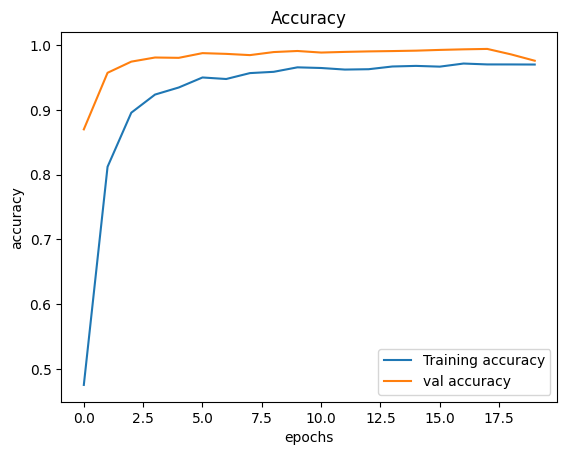

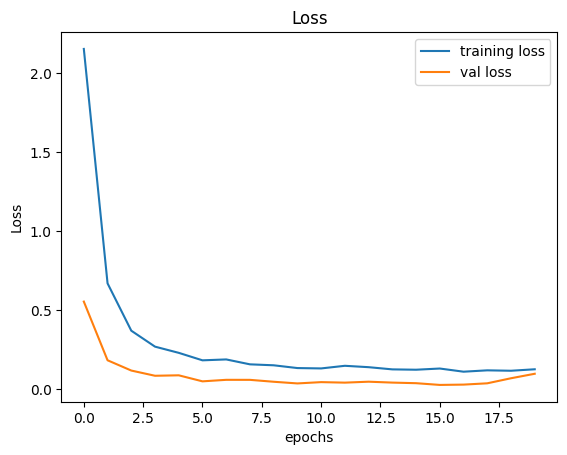

In [7]:
plt.figure(0) #underfitting
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('underfitting.png')
plt.figure(1) #overfiting
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('overfiting.png')
plt.show()

# **Testing the model**

In [8]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "/kaggle/input/gtsrb-german-traffic-sign"
test_imgs = test['Path'].values
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("accuracy: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 8s 19ms/step
accuracy:  0.9367379255740301


# **A few Outputs**

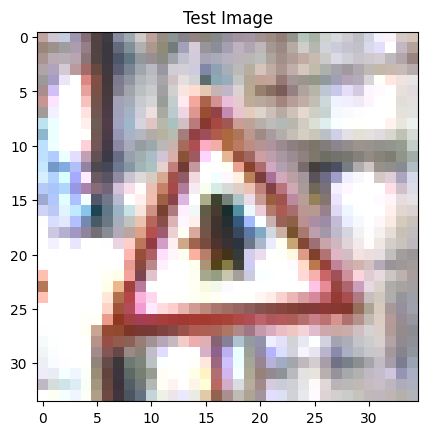

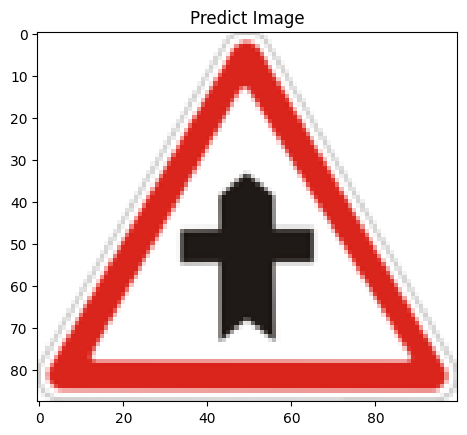

In [9]:
number_of_image_test = 25 #20

test_image_name = test_imgs[number_of_image_test]
image_label = test_labels[number_of_image_test]
plt.figure(0)
img_path = test_img_path + '/' + test_image_name
img = Image.open(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.figure(1)
img_pre = Image.open('/kaggle/input/gtsrb-german-traffic-sign/Meta/' + str(classes_x[number_of_image_test]) + '.png')
plt.imshow(img_pre)
plt.title("Predict Image")
plt.show()